# **Linear Regression Project - Predict Used Car Prices**

**Context**

India has a huge market of userd cards. Cars4U is in the business of selling used cars. As the used cars price is so uncertain, they need to estimate the selling price of the used car with the help of historical data. 

**Objective**

Create a liner regression model that can predict the price of used cars.

Dataset is given with previous sales of used cars. Use that information to build a linear regression model that can suggest what price should be set by Car4u to sell used car.

**Data Dictionary**

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

Price: The price of the used car in INR Lakhs

**Problem Definitions**

Based on the objective, below are the list of problem definitions. 

- What all features contribute to price of the used car?
- Does car price matters on how old is the car?
- Does kilometers driven on car affect the price of car? 
- How many previous owners matter? 
- How does type of Transmission effect pricing?
- Does Location where car being sold or available for purchase affect the price?
- Does brand/company matter? 
- Provided if everything same, does transmission type matters?
- Is new price of car relates to used car price?
- Has number of seats affect on the price of car?

# **1. Loading Required Libraries and Importing Data**

In [ ]:
# Importing libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Importing Libraries to help with EDA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create DataFrame 'cgd' by importing 'Cardio Good Fitness' file and make a copy of it just in case if need to revert back
cars = pd.read_csv('/content/drive/My Drive/Colab Notebooks/used_cars_data.csv')
cars_copy = cars.copy()

# **2. Exploring Data At High Level**

In [ ]:
# check sample records
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [ ]:
# checking for dups
cars.duplicated().sum()

0

There is 1 duplicate record in dataset. It should be removed.

In [ ]:
# dropping duplicate entries from the data
cars.drop_duplicates(inplace=True)

# resetting the index of data frame since 1 row is removed
cars.reset_index(drop=True,inplace=True)

In [ ]:
# checking rows and columns of dataframe
cars.shape

(7253, 14)

In [ ]:
# check datatypes and non null counts
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


By looking at sample records, shape and info about datatypes, few things are noticable right away -  

1) 'S.No.' column can is just the one up number and can be dropped as it won't be useful in any kind of analysis or predictions.

2) Mileage, Engine and Power are defined as 'object' even though they could be 'float'. The reason they are 'object' is because of the unit defined after each of these columns. We should remove those easily and convert those into 'float'

3) There are few nulls in some columns

In [ ]:
# check some stats of columns
cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Few observations - 

1) Most of the numeric values seem to have outliers

2) Target column (Price) has a very wide range of values (0.4 to 160 lakhs)

3) More than 50% cars are Diesel and over 70% are with Manual tranmission and having only 1 owner.

4) Kiolmeters_Driven column max value is way higher than 75th percentile value. It would be hard to do analysis on such. Let's create another column by dividing Kiolmeters_Driven to 1000. 

In [ ]:
# Checking for nulls

cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

There are few nulls in 4 columns. Let's treat them in later section.

# **3. Processing Few Columns**

Based on the observations from above section, let's process few columns.

Drop S.No. Column

In [ ]:
# Dropping S.No column
cars.drop(columns='S.No.',axis=1,inplace=True)

Conver Mileage, Engine and Power to float

In [ ]:
# Create a function to split just the number out of Mileage, Engine and Power
def fix_cols(col_name):
  if isinstance(col_name,str):
    return float(col_name.split()[0])
  else:
    return np.nan

In [ ]:
# Applying the function to fix Mileage, Engine and Power
cols= ['Mileage','Power','Engine']
for i in cols:
  cars[i] = cars[i].apply(fix_cols)

In [ ]:
# Making sure all worked as expected
for i in cols:
  print('Datatype of' ,i, 'is', cars[i].dtypes)

Datatype of Mileage is float64
Datatype of Power is float64
Datatype of Engine is float64


Modify Kilometer_Driven column 

In [ ]:
# Modifying Kilometer_Driver column
cars['Kilometers_Driven_In_K'] = cars['Kilometers_Driven']/1000

In [ ]:
# Dropping original column as it's not needed now.
cars.drop(columns='Kilometers_Driven',axis=1,inplace=True)

In [ ]:
# rearranging the columns
cars = cars[['Name', 'Location', 'Year', 'Kilometers_Driven_In_K','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_Price','Price']]

In [ ]:
# Checking data one more time
cars.head()

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


Looks good now.

# **4. Exploratory Data Analysis (EDA)**

### Univariate Analysis

In [ ]:
# checking types of all columns one more time for analysis
cars.dtypes

Name                       object
Location                   object
Year                        int64
Kilometers_Driven_In_K    float64
Fuel_Type                  object
Transmission               object
Owner_Type                 object
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
New_Price                 float64
Price                     float64
dtype: object

Create a function that can be used to plot Box and Histogram together

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

Apply above function on different numeric columns

**Price**

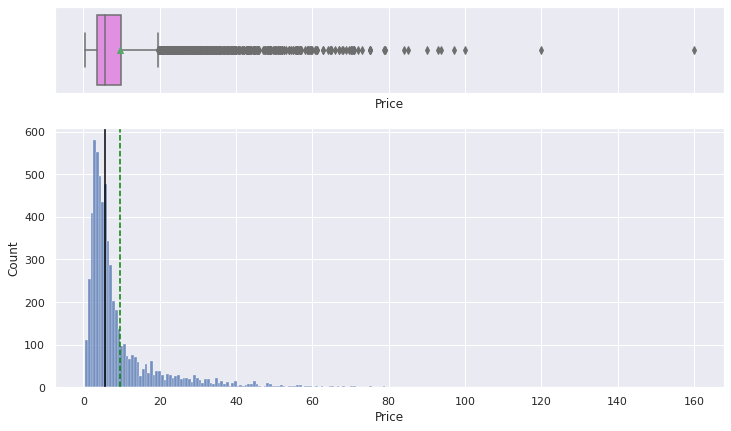

In [ ]:
histogram_boxplot(cars,'Price')

Price is heavily skewed. Many outliers after right whisker.

**New Price**

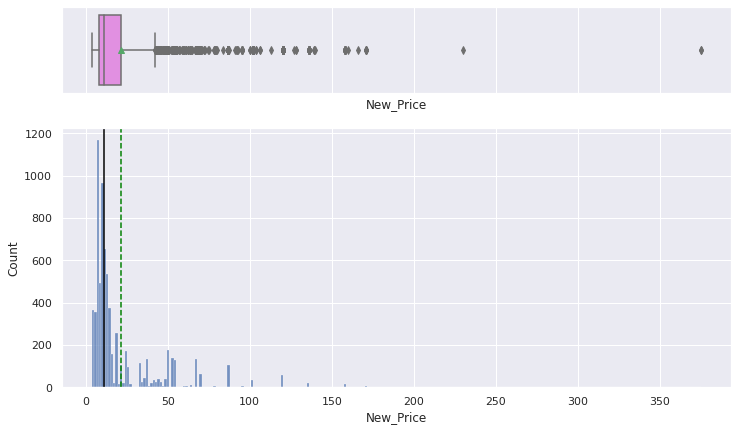

In [ ]:
histogram_boxplot(cars,'New_Price')

Same like Price column, its heavily skewed on right with many outliers. Couple of dots of outliers on right look far more away than usual. 

**Mileage**

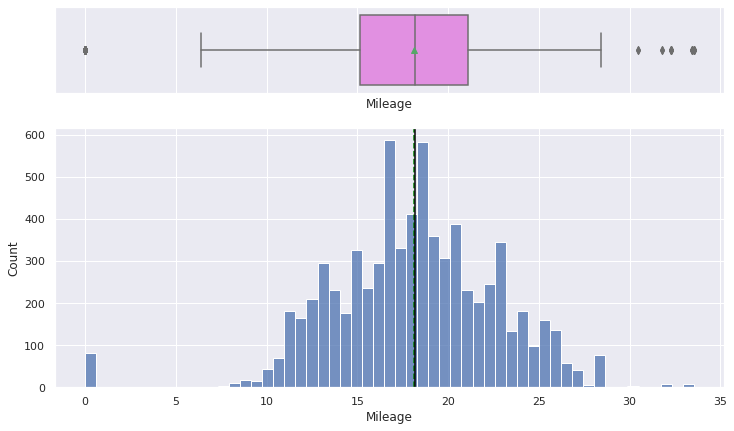

In [ ]:
histogram_boxplot(cars,'Mileage')

Mileage looks somewhat normally distributed. The mean & median value is around 18. There are few 0's that can't be right, need to treated later.

**Engine**

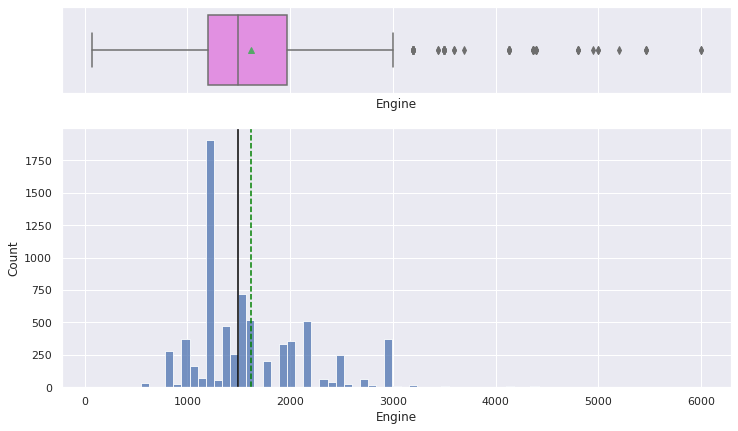

In [ ]:
histogram_boxplot(cars,'Engine')

Engine looks right-skewed with maximum cars having value around 1200CC engine

**Power**

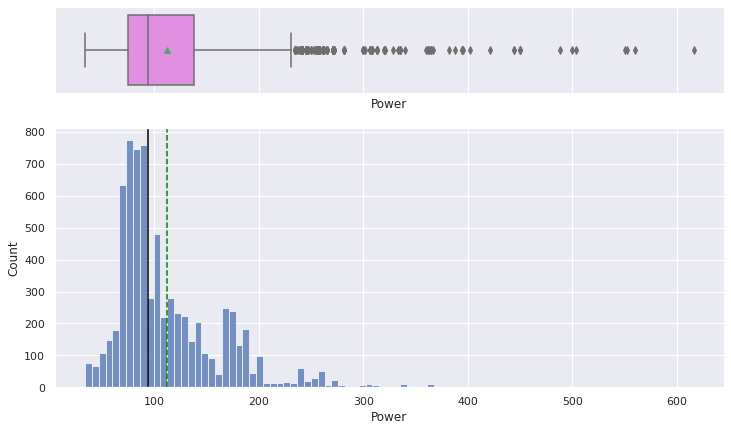

In [ ]:
histogram_boxplot(cars,'Power')

Power is skewed right and has many outliers on right. Right whisker is around 225

**Seats**

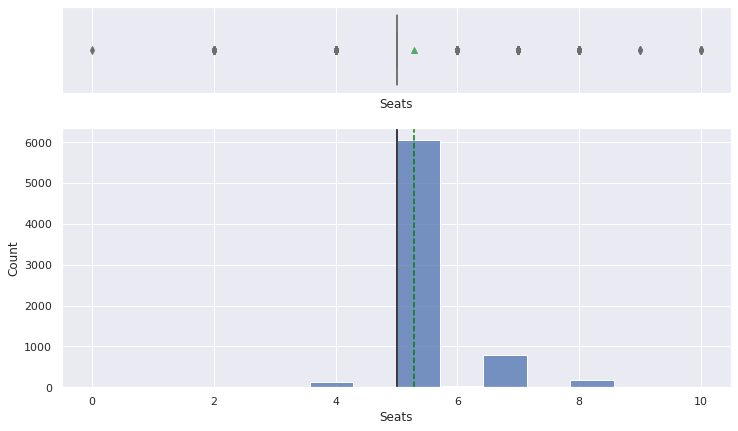

In [ ]:
histogram_boxplot(cars,'Seats')

Majority cars have 5 seats. Some has 2 and 8, nothing looks abnormal here except one outlier on left is algined with 0, we will have to treat later in outlier section.

**Year**

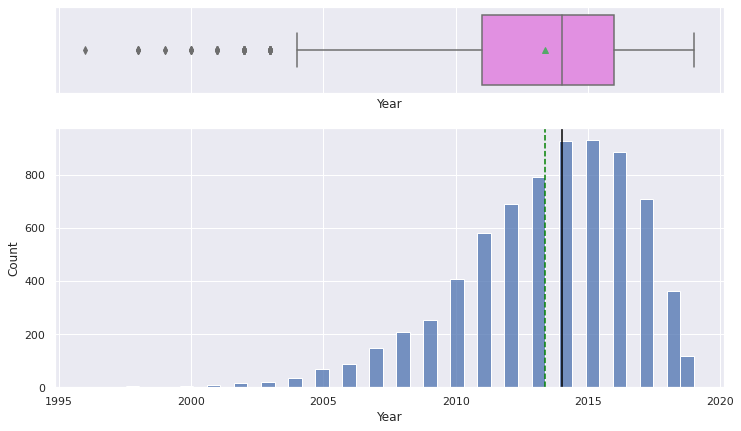

In [ ]:
histogram_boxplot(cars,'Year')

Year data looks left-skewed and most of the cars are between 2012-2016.

**Kilometers_Driven_In_K**

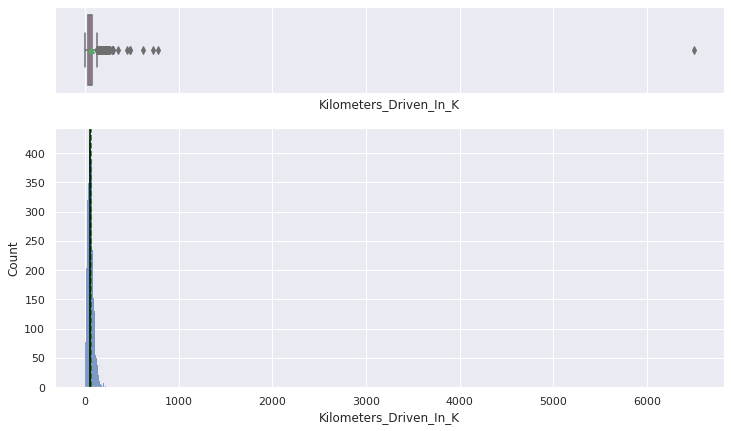

In [ ]:
histogram_boxplot(cars,'Kilometers_Driven_In_K')

Kilometers drive are heavily right-skewed 

Create Barplots for categorical columns. Let's create function to do that.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Fuel Type**

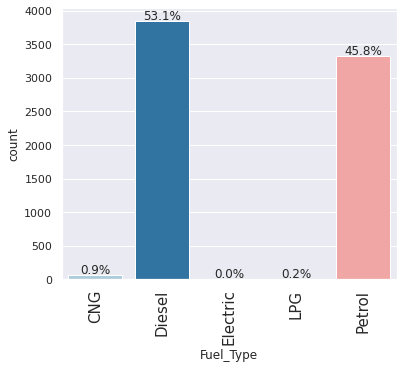

In [ ]:
labeled_barplot(cars, "Fuel_Type", perc=True)

Diesel and Petrol cars cover 99% of total cars

**Transmission**

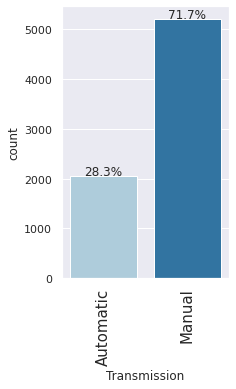

In [ ]:
labeled_barplot(cars, "Transmission", perc=True)

71% cars are manual and rest automatic. No bad values are there. 

**Owner Type**

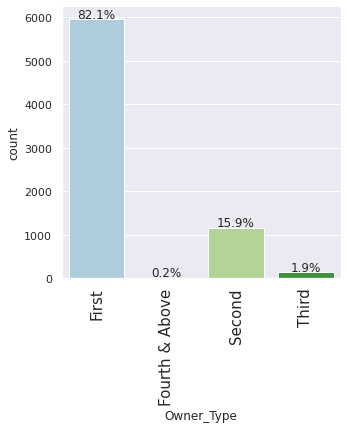

In [ ]:
labeled_barplot(cars, "Owner_Type", perc=True)

Majority of cars have first owner. Very few have more than 4 owners

**Location**

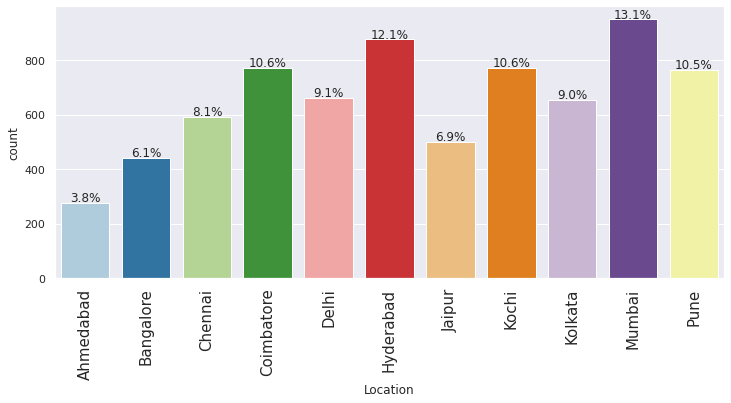

In [ ]:
labeled_barplot(cars, "Location", perc=True)

Cars data is well divided between different cities of India. All locations look valide, no bad data.

### Bivariate Analysis

Let's start by finding the correlations between different columns to get generic idea

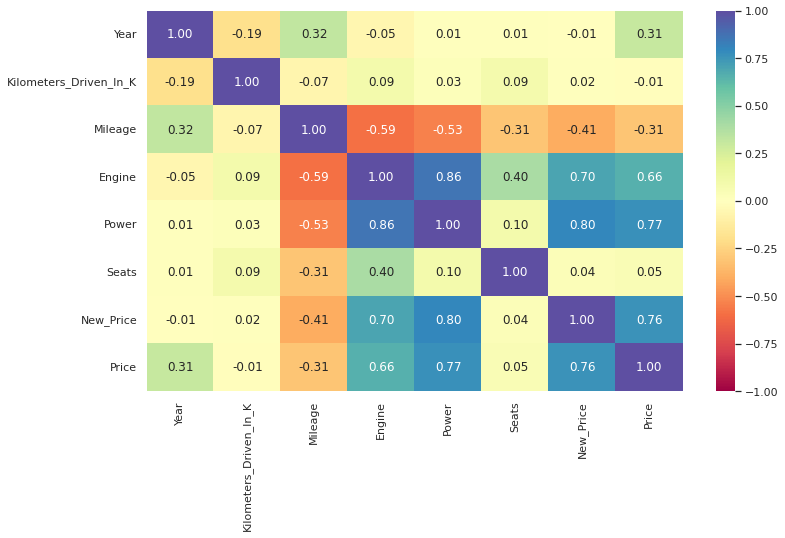

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    cars.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Few Observations -** 

Engine and Power are positively correlated

Price and New price both have positive correlation with Power and Engine

Kilometers driven is almost have 0 correlation with Price (that is surprising)

Year value has some positive correlation with Price but almost none with New Price

Mileage of the car is negatively correlated with Engine and Power

Let's check variation in Price by looking at all categorical columns of dataset

**Fuel Type vs. Price**

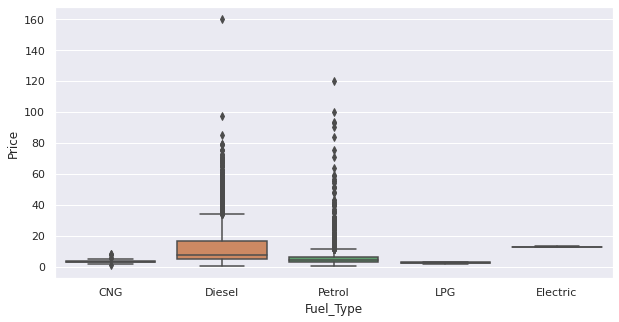

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=cars)
plt.show()

Diesel and Petrol cars have higher Price than rest of fuel types

**Owner Type vs. Price**

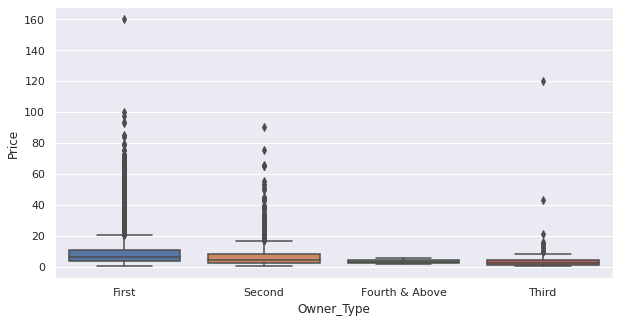

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=cars)
plt.show()

First and second owner doens't impact the price much. Third and above decreases the price of the car

**Transmission vs. Price**

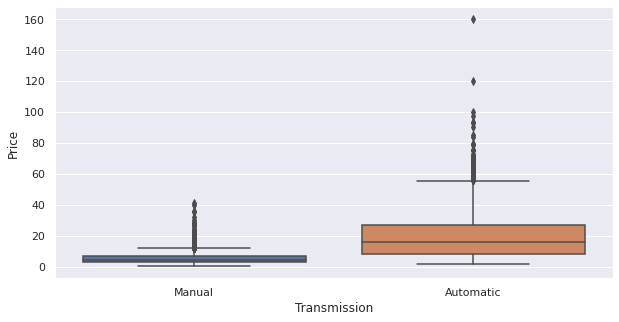

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=cars)
plt.show()

Automatic cars sell for higher price

**Location vs. Price**

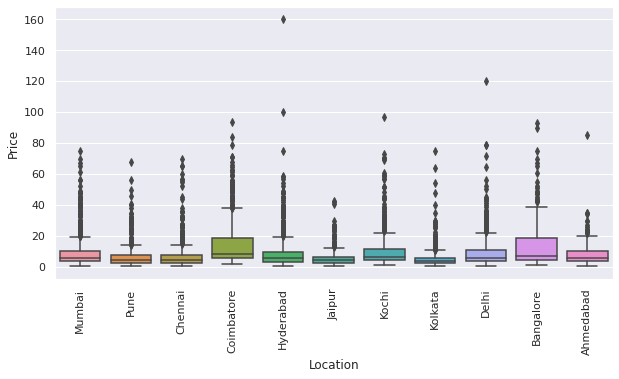

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=cars)
plt.xticks(rotation=90)
plt.show()

Coimbatore and Bangalore seem to have higher price range and Ahmedbabad and Jaipur have the lowest price (except few outliers). Rest all look in similar range. 

Let's build few more plots on numeric columns

**Mileage vs. Price**

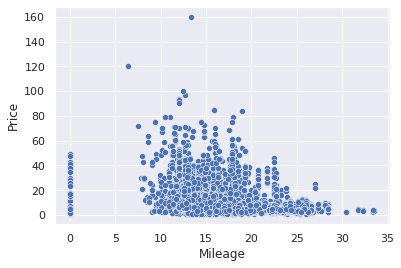

In [ ]:
sns.scatterplot(data=cars,x='Mileage',y='Price');

Similar price range across all different kind of mileage values

**Engine vs. Price**

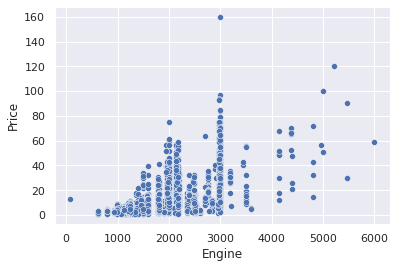

In [ ]:
sns.scatterplot(data=cars,x='Engine',y='Price');

3000CC has all kind of price range. 

**New Price vs. Price**

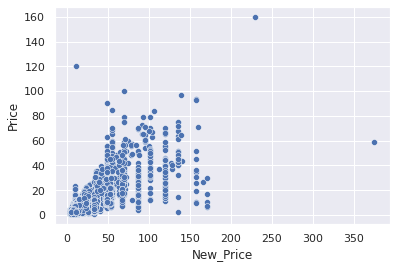

In [ ]:
sns.scatterplot(data=cars,x='New_Price',y='Price');

For many cases, price increases with new_price increase. In some cases price is much higher than new_price

**Engine vs. Power**

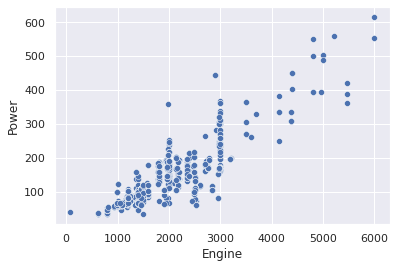

In [ ]:
sns.scatterplot(data=cars,x='Engine',y='Power');

In most of the cases higher the engine CC, higher the horsepower. 

**Year vs. Price**

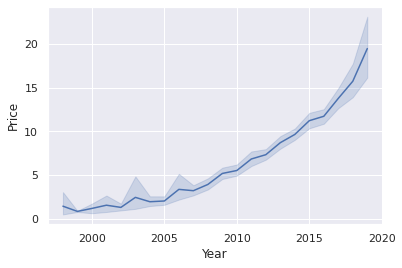

In [ ]:
sns.lineplot(data=cars,x='Year',y='Price');

With Year, price of the car increases

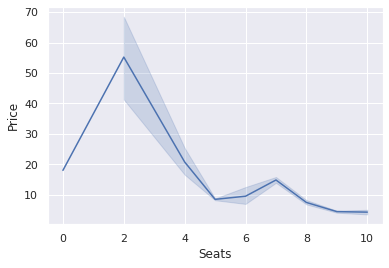

In [ ]:
sns.lineplot(data=cars,x='Seats',y='Price');

Two seater cars are the most expensive ones. 

### Summary of Observations of EDA

Price - price data is heavily right-skewed. It has lot of outliers after right whisker. 

New Price - same like price, its heavily right-skewed. 

Seats - most of the cars have 5 seats. 2 seaters (coup) cars have the highest price. Some records have 0 seats, which is bad data, need to be treated later. 

Mileage - its normally distributed compare to all the other numeric columns of dataset. However, it has some 0s which need to be fixed. 

Power - it is right-skewed and have lot of outliers after the right whisker which is around 225. 

Engine - it is right skewed and most of the cars have ~1200CC engine.

Year - majority cars are between 2012-2016 and newer the car, higher the price. 

Kilometers driven - it is heavily skewed on right. It has some heavy outliers on right side. 

Transmission - only 2 kinds of tranmissions. More than 70% cars have manual transmission. However, the price is higher for automatic tranmission cars. 

Fuel Type - 99% cars are either Diesel or Petrol. 

Owner Type - Majority cars have first owner. The price of the car doesn't impact much with first or second owner. It decreases after third owner. 

Location - data is distributed well across different locations. 

None of the categorical columns have bad data. All the values in all the columns look good. 

# **5. Data Pre-Processing**

### Treating Missing Values

**Price**

Price is the target variable and has the maximum amount of nulls, all the records with nulls should be dropped

In [ ]:
cars.dropna(subset=["Price"], inplace=True)

In [ ]:
cars.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven_In_K      0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     36
Power                     143
Seats                      42
New_Price                   0
Price                       0
dtype: int64

**Mileage**

There are only 2 missing Milage values. Let's take a look at those values

In [ ]:
# check 2 missing records
cars.loc[cars['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50.0,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44.0,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


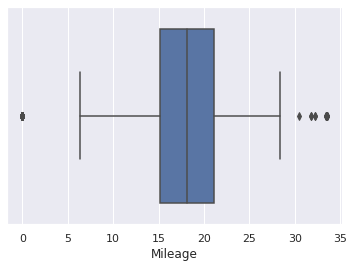

In [ ]:
sns.boxplot(data=cars,x='Mileage');

See some outliers, let's check mean and median to see the difference

In [ ]:
cars['Mileage'].mean()

18.134960943992073

In [ ]:
cars['Mileage'].median()

18.15

Mean and Median are not much difference. Missing Mileage can be replaced by either. I would do it with Median

In [ ]:
cars['Mileage'].fillna(cars['Mileage'].median(),inplace=True)

**Seats**




There are total 46 missing Seats values. Best way to fill that is to find another record of same car with non-missing seat value and use that to replace nulls.

In [ ]:
cars[['Seats']] = cars.groupby(["Name"])[['Seats']].transform(lambda x: x.fillna(x.median()))

# checking for missing values
cars.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven_In_K      0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     36
Power                     143
Seats                      36
New_Price                   0
Price                       0
dtype: int64

Out of 46, 36 are still null. Next, replace those by taking median of Seats across all the records

In [ ]:
cars['Seats'].fillna(cars['Seats'].median(),inplace=True)

In [ ]:
# checking for nulls agian
cars.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven_In_K      0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     36
Power                     143
Seats                       0
New_Price                   0
Price                       0
dtype: int64

**Engine**

There are total 36 missing Engine values. Let's take a look at those values

In [ ]:
cars[cars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60.006,Petrol,Manual,First,0.00,NaN,NaN,5.0,13.580,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42.001,Petrol,Manual,First,16.10,NaN,NaN,5.0,7.880,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97.800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,7.880,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55.001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,120.000,26.50
1294,Honda City 1.3 DX,Delhi,2009,55.005,Petrol,Manual,First,12.80,NaN,NaN,5.0,13.580,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50.295,Petrol,Manual,First,16.10,NaN,NaN,5.0,7.880,5.80
1385,Honda City 1.5 GXI,Pune,2004,115.000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,13.580,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69.078,Petrol,Manual,First,0.00,NaN,NaN,5.0,120.000,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24.255,Petrol,Manual,First,16.10,NaN,NaN,5.0,7.880,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52.146,Petrol,Manual,First,0.00,NaN,NaN,5.0,4.550,1.93


Observed that whenever the Engine is null, Power is null as well

In [ ]:
# checking correlation of fields
cars.corr()

,Year,Kilometers_Driven_In_K,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.173048,0.321534,-0.052197,0.014525,0.015204,-0.007432,0.305327
Kilometers_Driven_In_K,-0.173048,1.000000,-0.065253,0.091068,0.033503,0.082782,0.016720,-0.011493
Mileage,0.321534,-0.065253,1.000000,-0.597361,-0.537611,-0.299632,-0.415006,-0.306588
Engine,-0.052197,0.091068,-0.597361,1.000000,0.866185,0.393122,0.702333,0.658354
Power,0.014525,0.033503,-0.537611,0.866185,1.000000,0.101590,0.802773,0.772566
Seats,0.015204,0.082782,-0.299632,0.393122,0.101590,1.000000,0.038492,0.052811
New_Price,-0.007432,0.016720,-0.415006,0.702333,0.802773,0.038492,1.000000,0.763362
Price,0.305327,-0.011493,-0.306588,0.658354,0.772566,0.052811,0.763362,1.000000


Engine and Power are highly correlated. We can treat both same ways where both are nulls

In [ ]:
cars[cars.Engine.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,36,19,Maruti Swift 1.3 VXi,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,36,11,Pune,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,36.0,NaN,NaN,NaN,2009.222222,4.036343,2001.0,2006.0,2010.0,2012.0,2017.0
Kilometers_Driven_In_K,36.0,NaN,NaN,NaN,67.745639,34.038244,17.941,49.47125,63.579,80.25,200.0
Fuel_Type,36,2,Petrol,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,36,2,Manual,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,36,4,First,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,36.0,NaN,NaN,NaN,11.438889,7.849436,0.0,0.0,16.1,16.775,20.3
Engine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Not able to see clear pattern on other columns when Engine is null

In [ ]:
cars['Engine'].describe().T

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

Not much difference between mean and median (50 percentile) and seems to be big outliers by looking at max value, so will replace nulls with median

In [ ]:
cars['Engine'].fillna(cars['Engine'].median(), inplace=True)

**Power**

There are total 143 missing Power values. Let's check mean and median and try to treat same like Engine

In [ ]:
# Treating Power same way like Engine
cars['Power'].describe().T

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [ ]:
cars['Power'].fillna(cars['Power'].median(), inplace=True)

In [ ]:
# checking for nulls again
cars.isnull().sum()

Name                      0
Location                  0
Year                      0
Kilometers_Driven_In_K    0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Mileage                   0
Engine                    0
Power                     0
Seats                     0
New_Price                 0
Price                     0
dtype: int64

All missing values are treated

### Outliers Identification & Treatment

While doing EDA, outliers found in few numeric columns that we should check it out. All the categorical columns look ok.

In [ ]:
# Find the 25th percentile and 75th percentile for the numerical columns.
numeric_columns = ['Engine','Mileage','Power','Price','New_Price','Seats','Kilometers_Driven_In_K']
Q1 = cars[numeric_columns].quantile(0.25)
Q3 = cars[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((cars[numeric_columns] < lower_whisker) | (cars[numeric_columns] > upper_whisker)).sum()/cars.shape[0]*100

Engine                     1.013457
Mileage                    1.362353
Power                      3.970759
Price                     11.928892
New_Price                 15.351387
Seats                     15.999335
Kilometers_Driven_In_K     3.356039
dtype: float64

Let's check out each of them

**Price**

In [ ]:
cars['Price'].describe().T

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

There are so many outliers. From the boxplot before, it looks like the right whisker was close to 20 Lakes, however there were many recors till around 70 Lakes. Let's check how many cars are above 70 Lakes

In [ ]:
cars.loc[cars['Price']>70]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
282,Audi Q7 3.0 TDI Quattro Technology,Kochi,2018,11.287,Diesel,Automatic,First,12.07,2967.0,241.40,7.0,101.960,70.36
418,Mercedes-Benz GLC 43 AMG Coupe,Coimbatore,2018,22.397,Petrol,Automatic,First,11.50,2996.0,367.00,5.0,95.380,70.99
655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10.501,Petrol,Automatic,First,9.43,1999.0,237.40,5.0,69.675,75.00
1505,Land Rover Range Rover Sport SE,Kochi,2019,26.013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,139.000,97.07
1583,Audi Q7 45 TDI Quattro Premium Plus,Kochi,2019,6.773,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,91.380,72.94
1690,Mercedes-Benz GLE 350d,Coimbatore,2018,40.129,Diesel,Automatic,First,11.57,2987.0,254.79,5.0,95.130,70.80
1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,2018,6.000,Diesel,Automatic,First,11.00,2987.0,258.00,7.0,102.000,79.00
1974,BMW 7 Series 740Li,Coimbatore,2018,28.060,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,158.000,93.67
1984,BMW 7 Series 740Li,Bangalore,2017,17.465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,158.000,93.00
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2.526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,106.000,83.96


These look like luxurious cars and the price for it makes sense to me. I do not think we should treat these outliers.

**New Price**

In [ ]:
cars['New_Price'].describe().T

count    6019.000000
mean       21.499855
std        24.332922
min         3.910000
25%         7.880000
50%        11.300000
75%        21.770000
max       375.000000
Name: New_Price, dtype: float64

The numbers look similar to Price, still let me check few above 100 Lakes to make sure

In [ ]:
cars.loc[cars['New_Price']>100]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72.000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,120.00,27.00
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85.000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,120.00,17.50
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73.000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,136.00,14.50
148,Audi RS5 Coupe,Mumbai,2013,23.000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,128.00,37.00
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36.091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,120.00,55.76
282,Audi Q7 3.0 TDI Quattro Technology,Kochi,2018,11.287,Diesel,Automatic,First,12.07,2967.0,241.40,7.0,101.96,70.36
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44.000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,120.00,44.00
327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97.430,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,104.00,62.67
373,Audi Q7 3.0 TDI Quattro Premium Plus,Mumbai,2008,99.000,Diesel,Automatic,Third,12.07,2967.0,241.40,7.0,101.96,12.95
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56.000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,120.00,30.00


The higher values makes sense, these are all really that expensive cars.

However, observed for some records that 'new price' is lower than 'price'. It doesn't sound right. I would try to see how many such records are there. I would look to see if new price is lower than more than 1 lakes as sometime its possible based on demand/supply.

In [ ]:
cars.loc[cars['Price']>cars['New_Price']+1]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
392,Mercedes-Benz S Class 2005 2013 S 350 CDI,Coimbatore,2017,56.451,Diesel,Automatic,First,13.50,2987.0,282.00,5.0,49.490,62.81
431,Maruti Baleno Alpha Automatic,Coimbatore,2018,12.831,Petrol,Automatic,First,21.40,1197.0,83.10,5.0,8.800,9.89
655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10.501,Petrol,Automatic,First,9.43,1999.0,237.40,5.0,69.675,75.00
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22.732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,49.490,55.54
797,Maruti SX4 S Cross DDiS 200 Zeta,Mumbai,2017,26.000,Diesel,Manual,First,23.65,1248.0,88.50,5.0,7.880,9.75
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10.000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,49.490,55.00
918,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,Hyderabad,2016,76.000,Diesel,Automatic,First,15.97,2993.0,258.00,7.0,55.070,58.00
925,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Pune,2014,64.889,Diesel,Automatic,First,15.50,1896.0,105.00,5.0,10.150,11.50
1309,Volkswagen Beetle 2.0,Mumbai,2009,27.078,Petrol,Automatic,First,10.98,1984.0,114.40,4.0,10.150,15.95
1355,Hyundai Santa Fe 4WD AT,Chennai,2014,110.000,Diesel,Automatic,First,13.01,2199.0,194.30,7.0,10.250,14.40


In [ ]:
cars.loc[cars['Price']>cars['New_Price']+1].Name.count()

46

I will make 'New_Price' of all these 46 cars to Price

In [ ]:
cars["New_Price"] = np.where(cars["New_Price"] < cars["Price"]+1, cars["Price"], cars["New_Price"])

**Mileage**

In [ ]:
# Observed in EDA that there were some records of Mileage around 0 and some very high. Let's check stats
cars['Mileage'].describe().T

count    6019.000000
mean       18.134966
std         4.581528
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

Max value of Mileage is 33.5, which doesn't seem to be wrong. However, min is 0 which is not possible. Let's check that out.

In [ ]:
cars.loc[cars['Mileage']==0]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85.000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,120.000,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15.369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87.591,Petrol,Manual,First,0.0,1086.0,97.70,5.0,4.550,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60.006,Petrol,Manual,First,0.0,1493.0,97.70,5.0,13.580,2.95
229,Ford Figo Diesel,Bangalore,2015,70.436,Diesel,Manual,First,0.0,1498.0,99.00,5.0,7.650,3.60
262,Hyundai Santro Xing XL,Hyderabad,2006,99.000,Petrol,Manual,First,0.0,1086.0,97.70,5.0,4.550,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58.000,Petrol,Manual,Second,0.0,1086.0,97.70,5.0,4.550,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42.021,Diesel,Manual,First,0.0,1968.0,97.70,5.0,10.150,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50.243,Petrol,Manual,First,0.0,1086.0,97.70,5.0,4.550,3.35
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13.190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,49.490,38.99


Let's replace 0 with mean value of mileage

In [ ]:
mean_of_mileage = cars['Mileage'].mean()
cars['Mileage'] = [i  if i > 0 else float(int(mean_of_mileage)) for i in cars.Mileage]

In [ ]:
cars['Mileage'].describe().T

count    6019.000000
mean       18.338322
std         4.151279
min         6.400000
25%        15.400000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

Min value looks reasonable now

**Engine**

In [ ]:
cars['Engine'].describe().T

count    6019.000000
mean     1620.509221
std       599.635458
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

As observed in EDA, above 3000 engines were outliers. Let's check out those cars above 3000 CC

In [ ]:
cars.loc[cars['Engine']>3000]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73.000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,136.000,14.50
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35.277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,49.490,30.00
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51.002,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,101.960,48.91
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79.926,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,101.960,29.77
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47.088,Petrol,Automatic,Second,10.13,3498.0,364.90,5.0,49.490,19.00
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22.732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.540,55.54
703,Ford Endeavour 3.2 Trend AT 4X4,Coimbatore,2017,50.484,Diesel,Automatic,First,10.91,3198.0,197.20,7.0,35.290,31.12
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10.000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.000,55.00
806,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,59.636,Diesel,Automatic,First,10.91,3198.0,197.00,7.0,35.290,29.20
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10.000,Petrol,Manual,First,9.00,3436.0,97.70,2.0,136.000,40.00


Googled few of above cars to see their CC value and they match so not need to treat those.

**Power**

In [ ]:
cars['Power'].describe().T

count    6019.000000
mean      112.883539
std        53.283701
min        34.200000
25%        78.000000
50%        97.700000
75%       138.030000
max       560.000000
Name: Power, dtype: float64

In [ ]:
cars.loc[cars['Power']>225]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85.000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,49.490,28.00
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73.000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,136.000,14.50
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30.000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,53.140,9.80
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78.000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,69.675,24.00
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13.372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,95.040,54.00
148,Audi RS5 Coupe,Mumbai,2013,23.000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,128.000,37.00
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35.277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,49.490,30.00
168,BMW X5 xDrive 30d,Mumbai,2015,41.000,Diesel,Automatic,First,15.30,2993.0,258.00,5.0,55.070,45.00
216,Audi A8 L 3.0 TDI quattro,Delhi,2012,56.000,Diesel,Automatic,First,11.80,2967.0,246.70,5.0,53.140,45.00
264,Mercedes-Benz GLE 350d,Coimbatore,2017,29.819,Diesel,Automatic,First,11.57,2987.0,254.79,5.0,95.130,61.29


Checked few of these cars, looks like outliers are valid. These are luxurious cars they have such high horsepower. We should not treat those and leave it as is.

**Kilometers Driven**

In [ ]:
cars['Kilometers_Driven_In_K'].describe().T

count    6019.000000
mean       58.738380
std        91.268843
min         0.171000
25%        34.000000
50%        53.000000
75%        73.000000
max      6500.000000
Name: Kilometers_Driven_In_K, dtype: float64

There are huge outliers. As this column is already divided by 1000, so the max value of 6500 doesn't make sense. I would consider anything above 250 (which is 250,000 km) treatable. 

In [ ]:
cars.loc[cars['Kilometers_Driven_In_K']>250]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262.000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00,7.0,24.01,4.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775.000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,25.83,7.50
358,Hyundai i10 Magna 1.2,Chennai,2009,620.000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,10.25,2.70
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299.322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,24.01,4.00
1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,2013,255.000,Diesel,Manual,Third,12.99,2494.0,100.60,7.0,24.01,6.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720.000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.90
1975,Skoda Superb 1.8 TSI MT,Pune,2012,282.000,Petrol,Manual,First,13.14,1798.0,160.00,5.0,33.36,3.30
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500.000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,65.00,65.00
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480.000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,13.00,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480.000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,13.58,5.00


In [ ]:
cars["Kilometers_Driven_In_K"] = np.where(cars["Kilometers_Driven_In_K"] > 250, 250, cars["Kilometers_Driven_In_K"])

In [ ]:
cars['Kilometers_Driven_In_K'].describe().T

count    6019.000000
mean       57.339756
std        34.232061
min         0.171000
25%        34.000000
50%        53.000000
75%        73.000000
max       250.000000
Name: Kilometers_Driven_In_K, dtype: float64

Looks good now. Mean didn't change much as the outliers were just 3% 

**Seats**

In [ ]:
# Observed during EDA that there could be some cars with seats as 0, let's check

cars.loc[cars['Seats']==0]

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125.0,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,53.14,18.0


There is only 1 car with 0 seats. Let's check if we have another record with same car. If yes, we can get the seat info from there and replace 0 with that. If no, then we can replace with it's median value 5

In [ ]:
cars.loc[cars['Name']=='Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125.0,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,53.14,18.0


No other records with same model

In [ ]:
# Replace value 0 with 5
cars.at[3999,'Seats'] = 5

In [ ]:
# Let's check it out 
cars.loc[cars['Name']=='Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125.0,Petrol,Automatic,First,10.5,3197.0,97.7,5.0,53.14,18.0


In [ ]:
cars.head()

,Name,Location,Year,Kilometers_Driven_In_K,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


### Feature Engineering

Let's find out categorical columns and try to do encoding so can be used for modelling

In [ ]:
# checking for all categorical columns
cars.dtypes[cars.dtypes=='object']

Name            object
Location        object
Fuel_Type       object
Transmission    object
Owner_Type      object
dtype: object

There are 5 object columns - Name, Location, Fuel_Type, Transmission and Owner_Type. By looking at sample data earlier 'Name' has lot of different values but rest look ok. Let's see the unique value counts of all rest.

In [ ]:
cars['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
cars['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
cars['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
cars['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

By looking at above 4 fields, it seems like all the values of all of them look valid. One-hot coding can be applied on those to make them use for modelling

In [ ]:
# Applying one-hot coding on Fuel_Type, Transmission, Owner_Type and Location
cars = pd.get_dummies(cars, columns=['Fuel_Type'])
cars = pd.get_dummies(cars, columns=['Transmission'])
cars = pd.get_dummies(cars, columns=['Owner_Type'])
cars = pd.get_dummies(cars, columns=['Location'])

In [ ]:
cars.columns

Index(['Name', 'Year', 'Kilometers_Driven_In_K', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune'],
      dtype='object')

We can drop one column from each one-hot coding column as we don't need all

In [ ]:
cars.drop(columns=['Fuel_Type_CNG','Transmission_Automatic','Location_Jaipur','Owner_Type_Third'],axis=1,inplace=True)

Let's check 'Name' column now

In [ ]:
# Find the unique values of car names
len(cars['Name'].unique())

1876

There are so many unique values. By observing the data, it looks like the first word in the name is the company(brand) name and the second word is model name. We can create 2 fields and see how many uniques values we get.

In [ ]:
Company_Name=[]
Model_Name=[]
for i in cars['Name']:
  Company_Name.append(i.split()[0])
  Model_Name.append(i.split()[1])

cars.insert(1,'Company_Name', Company_Name)
cars.insert(2,'Model_Name', Model_Name)

In [ ]:
# check how many unique company_name and model_name
len(cars['Company_Name'].unique())

31

In [ ]:
len(cars['Model_Name'].unique())

212

In [ ]:
cars['Company_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company_Name, dtype: int64

Looks good

In [ ]:
pd.set_option('display.max_rows', 500)
cars['Model_Name'].value_counts()

Swift          353
City           270
i20            247
Verna          170
Innova         164
i10            156
Grand          156
Wagon          154
Polo           151
Alto           143
XUV500         113
Vento          107
Amaze          106
New            102
Figo           101
Fortuner       101
3               98
Creta           93
E-Class         88
Duster          83
A4              78
Santro          78
Ertiga          75
Ciaz            71
Corolla         68
5               68
Ritz            64
Baleno          63
Etios           61
EON             61
Scorpio         61
Rover           60
Brio            60
Xcent           59
Celerio         58
Jazz            58
Ecosport        53
Superb          49
A6              49
Rapid           47
Beat            46
Vitara          43
EcoSport        42
Fiesta          40
KWID            40
Indica          40
Endeavour       39
Q7              38
SX4             37
Micra           33
Civic           32
X1              32
Octavia     

Observed that value 'Rover' has 67 records. However, 'Rover' is not the model name, its the part of company name - Land Rover - We need to treat Land Rover different. 

I am going to drop newly created columns again and treat Land Rover differently than others. 

In [ ]:
cars.drop(columns=['Company_Name','Model_Name'],axis=1,inplace=True)

In [ ]:
Company_Name=[]
Model_Name=[]
for i in cars['Name']:
  if i.split()[0]=='Land' and i.split()[1]=='Rover':
    new_name= i.split()[0] + '_' + i.split()[1]
    Company_Name.append(new_name)
    Model_Name.append(i.split()[2])
  else:
    Company_Name.append(i.split()[0])
    Model_Name.append(i.split()[1])

cars.insert(1,'Company_Name', Company_Name)
cars.insert(2,'Model_Name', Model_Name)

Even though after creating company name and model name, the unique counts became lesser than Name, still it's high. We might not need to do one-hot coding on all the values. 

Let's create 2 variables and store the value counts of company name and model name and see how much is needed

In [ ]:
val_cname = cars['Company_Name'].value_counts()

In [ ]:
val_cname

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land_Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company_Name, dtype: int64

It doesn't make sense to convert each of above values into a column by doing one hot coding. We can use a threshold value, say around 15 and keep only those company_name and rest can go into 'others' bucket.

In [ ]:
# Set the threshold and find all the values greater than that
threshold= 15
val_cname_gt_threshold = val_cname[val_cname>=threshold]
val_cname_gt_threshold

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land_Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Name: Company_Name, dtype: int64

In [ ]:
# find all the values lesser than threshold
val_cname_lt_threshold = val_cname[val_cname<threshold]
val_cname_lt_threshold

Datsun         13
Force           3
ISUZU           2
Smart           1
Ambassador      1
Isuzu           1
Bentley         1
Lamborghini     1
Name: Company_Name, dtype: int64

Let's put all the records lesser than threshold into 'others' bucket

In [ ]:
cars.Company_Name = cars.Company_Name.apply(lambda x: 'other' if x in val_cname_lt_threshold else x)

In [ ]:
cars['Company_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land_Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
other              23
Volvo              21
Porsche            18
Jeep               15
Name: Company_Name, dtype: int64

Looks much better, one-hot coding can be applied on all these

In [ ]:
cars=pd.get_dummies(cars, columns=['Company_Name'])

Let's take same steps for Model_name

In [ ]:
pd.set_option('display.max_rows', 500)
val_mname = cars['Model_Name'].value_counts()

In [ ]:
val_mname

Swift          353
City           270
i20            247
Verna          170
Innova         164
i10            156
Grand          156
Wagon          154
Polo           151
Alto           143
XUV500         113
Vento          107
Amaze          106
New            102
Figo           101
Fortuner       101
3               98
Creta           93
E-Class         88
Duster          83
Santro          78
A4              78
Ertiga          75
Ciaz            71
5               68
Corolla         68
Ritz            64
Baleno          63
Scorpio         61
Etios           61
EON             61
Brio            60
Xcent           59
Celerio         58
Jazz            58
Ecosport        53
A6              49
Superb          49
Rapid           47
Beat            46
Vitara          43
EcoSport        42
Indica          40
KWID            40
Fiesta          40
Endeavour       39
Q7              38
SX4             37
Micra           33
X1              32
Civic           32
Indigo          31
Range       

It doesn't make sense to convert each of above values into a column by doing one hot coding. We can use a threshold value, say around 50 and keep only those company_name and rest can go into 'others' bucket.

In [ ]:
# Set the threshold and find all the values greater than that
threshold = 30
val_mname_gt_threshold = val_mname[val_mname>=threshold]
val_mname_gt_threshold

Swift        353
City         270
i20          247
Verna        170
Innova       164
i10          156
Grand        156
Wagon        154
Polo         151
Alto         143
XUV500       113
Vento        107
Amaze        106
New          102
Figo         101
Fortuner     101
3             98
Creta         93
E-Class       88
Duster        83
Santro        78
A4            78
Ertiga        75
Ciaz          71
5             68
Corolla       68
Ritz          64
Baleno        63
Scorpio       61
Etios         61
EON           61
Brio          60
Xcent         59
Celerio       58
Jazz          58
Ecosport      53
A6            49
Superb        49
Rapid         47
Beat          46
Vitara        43
EcoSport      42
Indica        40
KWID          40
Fiesta        40
Endeavour     39
Q7            38
SX4           37
Micra         33
X1            32
Civic         32
Indigo        31
Range         31
Octavia       31
Q5            30
XF            30
Name: Model_Name, dtype: int64

In [ ]:
# find all the values lesser than threshold
val_mname_lt_threshold = val_mname[val_mname<threshold]
val_mname_lt_threshold

Laura          29
Zen            29
CR-V           27
Q3             27
Accord         26
Sunny          26
Terrano        26
Nano           25
X5             24
Cooper         24
Dzire          24
Jetta          24
M-Class        23
Elantra        22
Xylo           21
Zest           21
Omni           20
Pajero         20
Ameo           19
Eeco           18
Accent         18
GLA            18
Cruze          18
A-Star         17
Santa          17
Freelander     17
S              17
Manza          16
Mobilio        16
Bolero         15
Ikon           15
Compass        15
Aveo           14
X3             14
Elite          14
KUV            14
CLA            13
Ssangyong      13
7              13
Linea          12
B              12
Discovery      12
800            12
Optra          12
GLE            12
Camry          11
GL-Class       11
Fabia          11
Tiago          11
Getz           10
Spark          10
TUV             9
Safari          9
Enjoy           9
A               8
Panamera  

Let's put all the records lesser than threshold into 'others' bucket

In [ ]:
cars.Model_Name = cars.Model_Name.apply(lambda x: 'other' if x in val_mname_lt_threshold else x)

Apply one-hot coding on all the values

In [ ]:
cars=pd.get_dummies(cars, columns=['Model_Name'])

In [ ]:
cars.shape

(6019, 108)

We do not need 'Name' column anymore, so let's drop it

In [ ]:
# Drop the column Name
cars.drop(columns='Name',axis=1,inplace=True)

In [ ]:
cars.shape

(6019, 107)

One more thing we should treat better way. Year column is numeric but the year value itself might not help much in predicting price, better to find the age using current year and that would add more weightage in determining the price.

In [ ]:
# creating new variable to find the age of car
cars["Age_of_car"] = 2022 - cars['Year']

In [ ]:
# Year column can be dropped
cars.drop(columns='Year', axis=1, inplace=True)

In [ ]:
cars.head()

,Kilometers_Driven_In_K,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Company_Name_Audi,Company_Name_BMW,Company_Name_Chevrolet,Company_Name_Fiat,Company_Name_Ford,Company_Name_Honda,Company_Name_Hyundai,Company_Name_Jaguar,Company_Name_Jeep,Company_Name_Land_Rover,Company_Name_Mahindra,Company_Name_Maruti,Company_Name_Mercedes-Benz,Company_Name_Mini,Company_Name_Mitsubishi,Company_Name_Nissan,Company_Name_Porsche,Company_Name_Renault,Company_Name_Skoda,Company_Name_Tata,Company_Name_Toyota,Company_Name_Volkswagen,Company_Name_Volvo,Company_Name_other,Model_Name_3,Model_Name_5,Model_Name_A4,Model_Name_A6,Model_Name_Alto,Model_Name_Amaze,Model_Name_Baleno,Model_Name_Beat,Model_Name_Brio,Model_Name_Celerio,Model_Name_Ciaz,Model_Name_City,Model_Name_Civic,Model_Name_Corolla,Model_Name_Creta,Model_Name_Duster,Model_Name_E-Class,Model_Name_EON,Model_Name_EcoSport,Model_Name_Ecosport,Model_Name_Endeavour,Model_Name_Ertiga,Model_Name_Etios,Model_Name_Fiesta,Model_Name_Figo,Model_Name_Fortuner,Model_Name_Grand,Model_Name_Indica,Model_Name_Indigo,Model_Name_Innova,Model_Name_Jazz,Model_Name_KWID,Model_Name_Micra,Model_Name_New,Model_Name_Octavia,Model_Name_Polo,Model_Name_Q5,Model_Name_Q7,Model_Name_Range,Model_Name_Rapid,Model_Name_Ritz,Model_Name_SX4,Model_Name_Santro,Model_Name_Scorpio,Model_Name_Superb,Model_Name_Swift,Model_Name_Vento,Model_Name_Verna,Model_Name_Vitara,Model_Name_Wagon,Model_Name_X1,Model_Name_XF,Model_Name_XUV500,Model_Name_Xcent,Model_Name_i10,Model_Name_i20,Model_Name_other,Age_of_car
0,72.00,26.60,998.0,58.16,5.0,5.51,1.75,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12
1,41.00,19.67,1582.0,126.20,5.0,16.06,12.50,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,46.00,18.20,1199.0,88.70,5.0,8.61,4.50,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
3,87.00,20.77,1248.0,88.76,7.0,11.27,6.00,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,40.67,15.20,1968.0,140.80,5.0,53.14,17.74,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


# **6. Variable Transformation**

Let's check the numeric columns other than the ones created by one-hot coding (original ones) for skewness

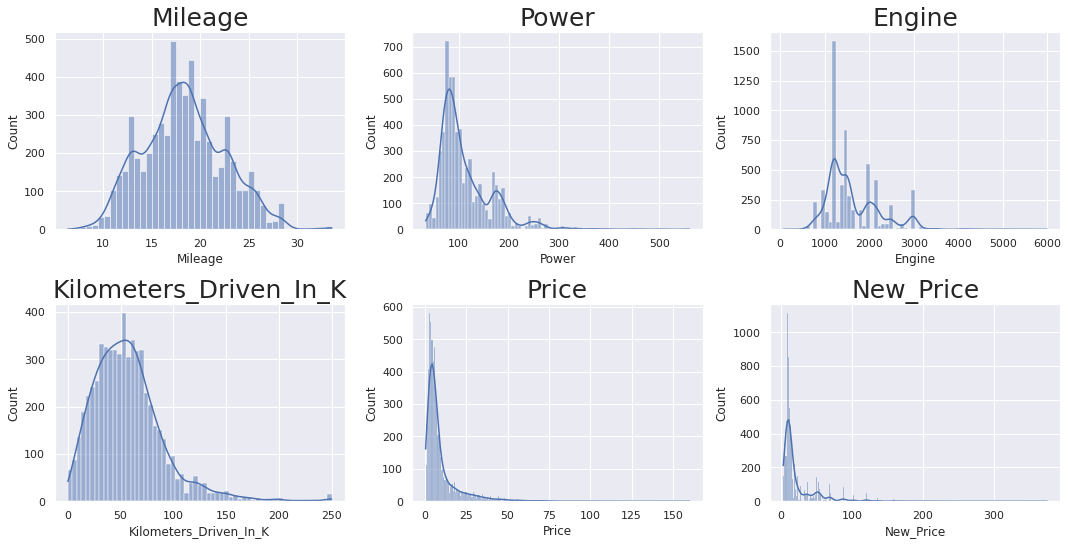

In [ ]:
# creating a list of original columns
orig_cols = ['Mileage','Power','Engine','Kilometers_Driven_In_K','Price','New_Price']

# plot a histogram of all orig columns

plt.figure(figsize=(15, 45))

for i in range(len(orig_cols)):
    plt.subplot(12, 3, i + 1)
    sns.histplot(data=cars, x=orig_cols[i], kde=True)
    plt.tight_layout()
    plt.title(orig_cols[i], fontsize=25)

plt.show()

Other than Mileage all other columns look highly skewed. We should apply log transform to make the skewness better

**Log Transformation**

In [ ]:
# dropping mileage from orig list
orig_cols.remove('Mileage')

In [ ]:
# create log transforms on orig columns

for col in orig_cols:
    cars[col + "_log"] = np.log(cars[col] + 1)

# dropping the original columns except Price
orig_cols.remove('Price') # removing Price from orig_cols because do not want to drop it from cars dataframe as I need it for modeling later. 
cars.drop(orig_cols, axis=1, inplace=True)

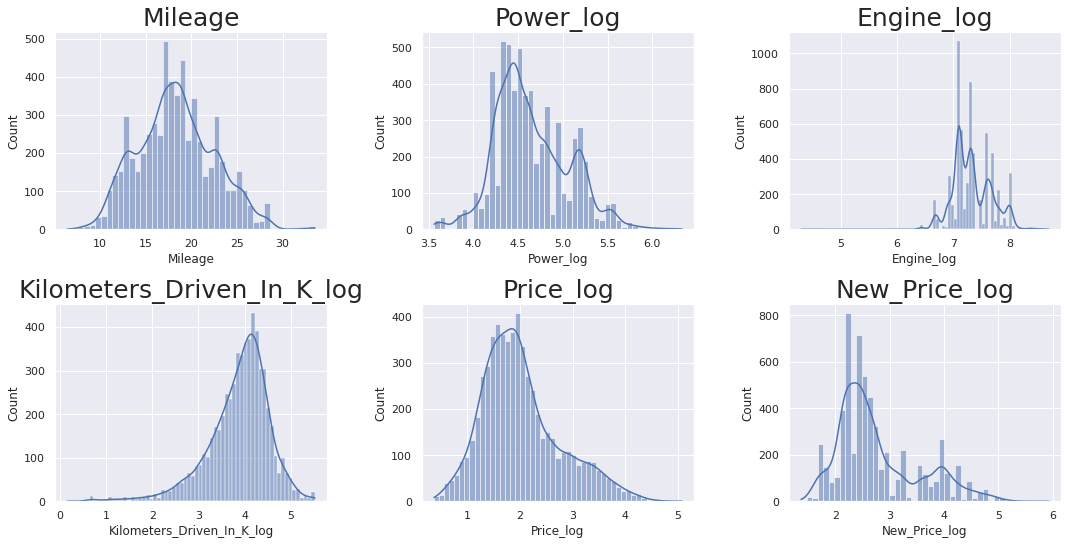

In [ ]:
# creating a list again from original columns with _log 
orig_cols = ['Mileage','Power_log','Engine_log','Kilometers_Driven_In_K_log','Price_log','New_Price_log']

# plot histogram of all orig columns

plt.figure(figsize=(15, 45))

for i in range(len(orig_cols)):
    plt.subplot(12, 3, i + 1)
    sns.histplot(data=cars, x=orig_cols[i], kde=True) 
    plt.tight_layout()
    plt.title(orig_cols[i], fontsize=25)

plt.show()

Distribution in all columns looks much better after the log transformation. We should use log columns for linear regression model building

# **7. Model Building & Evaluation**

Let's build model 2 ways. One is using target column 'Price' and other is with 'Price_log'. As we saw in previous section, 'Price_log' is less skewed and better distributed compared to 'Price', I would like to see how they both perform.

## Model Building With 'Price' column

In [ ]:
# creating x and y where x is the whole dataframe except target('Price' and 'Price_log') and y is only target('Price')
x = cars.copy()
x.drop(columns='Price',axis=1,inplace=True)
x.drop(columns='Price_log',axis=1,inplace=True)
y = cars['Price']

In [ ]:
# Split train and test with 70-30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# Fit Liner Regression model
lin_reg_model_Price = LinearRegression()
lin_reg_model_Price.fit(x_train, y_train)

LinearRegression()

Finding Coefficient of all the columns and Intercept value

In [ ]:
# checking coefficients and intercepts
coef_df = pd.DataFrame(
    np.append(lin_reg_model_Price.coef_, lin_reg_model_Price.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.152980
Seats,-0.778850
Fuel_Type_Diesel,0.580702
Fuel_Type_Electric,4.892753
Fuel_Type_LPG,-1.103772
Fuel_Type_Petrol,-1.138744
Transmission_Manual,0.125063
Owner_Type_First,-1.260063
Owner_Type_Fourth & Above,-1.194460
Owner_Type_Second,-1.664689


Observations - 

Coefficients of the log of Engine, Power, New_Price are positive so with increase of those, Price also increases.

Coefficients of the log of kilometers driven and coefficient of Mileage are negative so with increase of those, Price decreases.

Intercept is ~ -32

### 'Price' Model Performance Evaluation

Create a function to calculate R-squared, adjusted R-squared, RMSE, MAE and MAPE values

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf_Price = model_performance_regression(lin_reg_model_Price, x_train, y_train)
lin_reg_model_train_perf_Price

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.909438,2.679637,0.811503,0.806637,51.745319


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf_Price = model_performance_regression(lin_reg_model_Price, x_test, y_test)
lin_reg_model_test_perf_Price

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.845264,2.73826,0.80231,0.789976,49.18317


Observations

Train and Test dataset has R-squared values as 81% and 80% respectively and adjusted R-squared values are 80% and 78% respectively. 

Both R-squared and adjusted R-squared values are close enough. 

RMSE - same like above, it's comparable. So the model is not overfitting. 

MAE - mean absolute error is 2.7% meaning it can predict the model with that much of error.

MAPE - its at 49% in test data, meaning it's able to predict price witin 49% of data.

RMSE, MAE and MAPE are pretty high.

Let's try with 'Price_Log' now and see if it can make it better and how much.

## Model Building With 'Price Log' column

In [ ]:
# creating x and y where x is the whole dataframe except target('Price' and 'Price_log') and y is only target('Price_Log')
x = cars.copy()
x.drop(columns='Price',axis=1,inplace=True)
x.drop(columns='Price_log',axis=1,inplace=True)
y = cars['Price_log']

In [ ]:
# Split train and test with 70-30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# Fit Liner Regression model
lin_reg_model_Price_Log = LinearRegression()
lin_reg_model_Price_Log.fit(x_train, y_train)

LinearRegression()

In [ ]:
# checking coefficients and intercepts
coef_df = pd.DataFrame(
    np.append(lin_reg_model_Price_Log.coef_, lin_reg_model_Price_Log.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.006094
Seats,0.004452
Fuel_Type_Diesel,0.069328
Fuel_Type_Electric,0.608109
Fuel_Type_LPG,-0.034114
Fuel_Type_Petrol,-0.083291
Transmission_Manual,-0.089228
Owner_Type_First,0.079050
Owner_Type_Fourth & Above,0.015460
Owner_Type_Second,0.035185


Observations about coefficients remain same. 

Intercept changed to -8

### 'Price Log' Model Performance Evaluation

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf_Price_Log = model_performance_regression(lin_reg_model_Price_Log, x_train, y_train)
lin_reg_model_train_perf_Price_Log

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.170161,0.119625,0.947983,0.94664,6.946684


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf_Price_Log = model_performance_regression(lin_reg_model_Price_Log, x_test, y_test)
lin_reg_model_test_perf_Price_Log

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.163155,0.11951,0.952999,0.950066,6.80495


As you can see, by using log of Price, the R-squared and adjusted R-squared improved a lot (more than 15%) in both Train and Test. 

RMSE, MAE and MAPE dropped down drastically. 

We can use log of price model, but need to apply inverse function on the predicated value by this model to get the actual target value. So it's an extra step but still worth it.


# **8. Summary of Insights & Recommendations**

- Linear regression model for price_log can be used to predict the price for used car. It has R-squared and adjusted R-squared values at 95% on test data meaning these much fraction of variance of price was explained by regression, that is a good number. Also, the MAPE is just 6.8% meaning it is able to predict within less than 7% of the price value. RMSE and MSE are 0.1% on test data, which is very less so it says how good fit the regression is and also, comparable to training data, so its not a overfit model also. 

- Coimbatore, Mumbai, Bangalore seem be have higher price range market. However, Ahmedbabad and Jaipur are lower price range. One option to look for is to buy from lower range market and sell in higher range market. Of course, the transportation cost need to be considered but worth looking into it. 

- Newer the car, higher the price range. However, maximum cars sold were betweeen 3-5 years old. Cars4U should consider buying newer car (at least < 5 years old) in cheaper price to get better margin.  

- Sale of Diesel cars is higher compare to petrol cars and price is also higher.So Cars4U should invest in buying diesel cars. 

- Cars with 5 seats sold the highest, however maximum price was on coup cars. Cars4U should consider buying coup cars in less price as possible to get best profit margin. 

- Luxurios cars like Bently, Lamborgini, Mercedes S, BMW 6 etc. all sale on much higher price compare to Maruti and such other cars. Cars4U should focus on selling such cars in locations like Mumbai, Hydrabad, Banglore where people earn more and pay high price for such cars. 

- Automatic cars sale is lesser compare to manual but they sale at much higher price. So automatic cars need to be considered for higher sale. 

- Cars4U should avoid buying car if it was owned by 3 or more people, the price value of such cars is much lower compare to first and second. 

- In my opinion, few more information would be useful to have in dataset to determine the price of the used car. For example, accident history of the car, what additional features added, the condition of the car (categories -like new, new, good, normal, bad, very bad) etc. 

